In [ ]:
%pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_and_nutrition_examination_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X = national_health_and_nutrition_health_and_nutrition_examination_survey_2013_2014_nhanes_age_prediction_subset.data.features
y = national_health_and_nutrition_health_and_nutrition_examination_survey_2013_2014_nhanes_age_prediction_subset.data.targets

# metadata
print(national_health_and_nutrition_health_and_nutrition_examination_survey_2013_2014_nhanes_age_prediction_subset.metadata)

# variable information
print(national_health_and_nutrition_health_and_nutrition_examination_survey_2013_2014_nhanes_age_prediction_subset.variables)

{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [ ]:
#@title Jumlah Data ( N )

print("Jumlah data fitur (X):", X.shape)
print("Jumlah data label (y):", y.shape)

Jumlah data fitur (X): (2278, 7)
Jumlah data label (y): (2278, 1)


# **Kolom Fitur**

In [ ]:
#@title Cek Kolom fitur

print("Kolom fitur (X):")
print(X.columns.tolist())

Kolom fitur (X):
['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']


In [ ]:
#@title Cek Tipe data Fitur

X.dtypes

,0
RIAGENDR,float64
PAQ605,float64
BMXBMI,float64
LBXGLU,float64
DIQ010,float64
LBXGLT,float64
LBXIN,float64


In [ ]:
#@title Cek Missing Value

print("Missing values pada fitur (X):")
X.isnull().sum()

Missing values pada fitur (X):


,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


# **Kolom Label ( Target )**

In [ ]:
#@title Cek Kolom target

print("Kolom target ( Label / y ) :")
y.head(13)

Kolom target ( Label / y ) :


,age_group
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult
5,Adult
6,Adult
7,Adult
8,Senior
9,Adult


In [ ]:
#@title Cek DataType Target

print("Tipe data label (y):")
y.dtypes

Tipe data label (y):


,0
age_group,object


In [ ]:
#@title Cek Missing Value

print("Missing values pada Label (y):")
y.isnull().sum()

Missing values pada Label (y):


,0
age_group,0


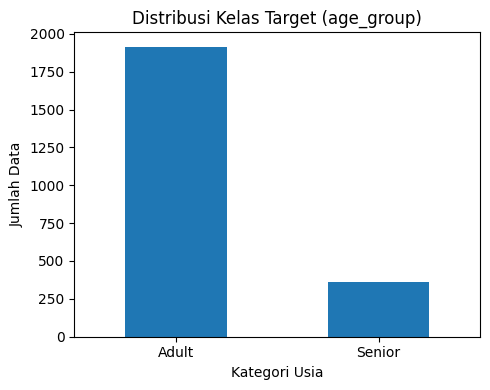

In [ ]:
# Distribusi kelas target

import matplotlib.pyplot as plt

# y adalah Series 'age_group', jadi panggil value_counts() langsung pada y
plt.figure(figsize=(5, 4))
y.value_counts().plot(kind='bar')

plt.title('Distribusi Kelas Target (age_group)')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#@title Scatter Plot BMI vs Glucose dengan label age_group

import plotly.express as px

fig = px.scatter(
    X,
    x="BMXBMI",
    y="LBXGLU",
    color=y['age_group'],
    labels={'BMXBMI': 'BMI', 'LBXGLU': 'Glucose', 'color': 'Age Group'},
    title="BMI vs Glucose berdasarkan Age Group",
    hover_data={
        "RIAGENDR": True,
        "PAQ605": True,
        "BMXBMI": True,
        "LBXGLU": True,
        "DIQ010": True,
        "LBXGLT": True,
        "LBXIN": True,
        "age_group": y["age_group"]
    }
)

fig.show()

In [ ]:
#@title Learning Setting

print("=== Learning Setting ===")
if any(dtype in ["int64", "float64"] for dtype in y.dtypes):
    print("Label numerik → regresi.")
else:
    print("Label kategorikal → klasifikasi.")

print("\n=== Kesimpulan ===")
if any(dtype in ["int64", "float64"] for dtype in y.dtypes):
    print("Problem ini adalah Supervised Regression.")
else:
    print("Problem ini adalah Supervised Classification.")

=== Learning Setting ===
Label kategorikal → klasifikasi.

=== Kesimpulan ===
Problem ini adalah Supervised Classification.


In [ ]:
#@title Train-Test Split

from sklearn.model_selection import train_test_split

# training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

#  training dan validasi
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

print("Jumlah data training: {}".format(len(X_train)))
print("Jumlah data validasi: {}".format(len(X_val)))
print("Jumlah data testing: {}".format(len(X_test)))

Jumlah data training: 1457
Jumlah data validasi: 365
Jumlah data testing: 456


# **FEATURE ENGINEERING**

# Transform Target / Label

In [ ]:
y.columns

Index(['age_group'], dtype='object')

In [ ]:
#@title One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(y[['age_group']])
hasil = ohe.transform(y[['age_group']]).toarray()
print(ohe.categories_)

[array(['Adult', 'Senior'], dtype=object)]


In [ ]:
pd.DataFrame(hasil, columns=ohe.categories_[0])

,Adult,Senior
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
2273,1.0,0.0
2274,1.0,0.0
2275,1.0,0.0
2276,1.0,0.0


# Standarisasi Fitur ( standarscaler )

In [ ]:
print(X.columns)

Index(['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'], dtype='object')


In [ ]:
X

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...
2273,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [ ]:
# Standarisasi dengan StandarScaler

from sklearn.preprocessing import StandardScaler
import pandas as pd

fitur_numerik = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[fitur_numerik])

X_scaled_df = pd.DataFrame(X_scaled, columns=fitur_numerik)
X_scaled_df.head()

,BMXBMI,LBXGLU,LBXGLT,LBXIN
0,1.068639,0.584085,0.744323,0.316487
1,-1.056270,-0.590024,-0.743427,-0.821762
2,-0.656125,-0.590024,-0.998470,-0.586084
3,0.130367,0.248625,-0.658413,0.444103
4,1.096235,0.192715,-0.722174,-0.094147


In [ ]:
import pandas as pd

# Kolom yang tidak diubah
kolom_tetap = ['RIAGENDR', 'PAQ605', 'DIQ010']
df_tetap = X[kolom_tetap].reset_index(drop=True)

# hasil -> df_ohe
df_ohe = pd.DataFrame(hasil, columns=ohe.categories_[0]).reset_index(drop=True)

# Gabung df
df_final = pd.concat([df_tetap, X_scaled_df, df_ohe], axis=1)

# Hasil
df_final.head()

,RIAGENDR,PAQ605,DIQ010,BMXBMI,LBXGLU,LBXGLT,LBXIN,Adult,Senior
0,2.0,2.0,2.0,1.068639,0.584085,0.744323,0.316487,1.0,0.0
1,2.0,2.0,2.0,-1.056270,-0.590024,-0.743427,-0.821762,1.0,0.0
2,1.0,2.0,2.0,-0.656125,-0.590024,-0.998470,-0.586084,1.0,0.0
3,1.0,2.0,2.0,0.130367,0.248625,-0.658413,0.444103,1.0,0.0
4,2.0,1.0,2.0,1.096235,0.192715,-0.722174,-0.094147,1.0,0.0


# **MODELING**

# Linear

In [ ]:
#@title Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(tol=0.05, solver='saga', random_state=42)
lr_model.fit(X=X_train, y=y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=42, solver='saga', tol=0.05)

In [ ]:
print("lr_model.coef_.shape:", lr_model.coef_.shape)
print("lr_model.intercept_.shape:", lr_model.intercept_.shape)

print("\nKoefisien (weights):")
print(lr_model.coef_)

print("\nIntercept:")
print(lr_model.intercept_)

lr_model.coef_.shape: (1, 7)
lr_model.intercept_.shape: (1,)

Koefisien (weights):
[[-0.00113885 -0.00083359 -0.01686937 -0.0313555  -0.00123548  0.01759852
  -0.01142503]]

Intercept:
[-0.00063741]


In [ ]:
#@title Evaluasi Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': lr_model,
}

datasets = {
    'Train': (X_train, y_train),
    'Validation': (X_val, y_val),
    'Test': (X_test, y_test)
}

for model_name, model in models.items():
    print(f"\n=== Evaluasi {model_name} ===")
    for name, (X_set, y_set) in datasets.items():
        y_pred = model.predict(X_set)

        acc = accuracy_score(y_set, y_pred)
        prec = precision_score(y_set, y_pred, pos_label='Senior')
        rec = recall_score(y_set, y_pred, pos_label='Senior')
        f1 = f1_score(y_set, y_pred, pos_label='Senior')

        print(f"{name}: Accuracy={acc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")


=== Evaluasi Logistic Regression ===
Train: Accuracy=0.8401 | Precision=0.5000 | Recall=0.0515 | F1=0.0934
Validation: Accuracy=0.8493 | Precision=0.7143 | Recall=0.0862 | F1=0.1538
Test: Accuracy=0.8333 | Precision=0.2857 | Recall=0.0274 | F1=0.0500


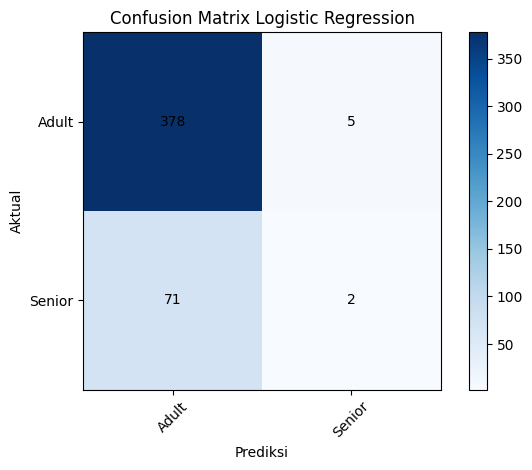

In [ ]:
# Confusion Matrix di Data Test

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Prediksi pada data test
y_test_pred = lr_model.predict(X_test)

labels = sorted(y_test.unique())

cm = confusion_matrix(y_test, y_test_pred, labels=labels)

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.colorbar()
tick_marks = range(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()
